In [18]:
import matplotlib.patches as plt_patches
import matplotlib.pyplot as plt

In [136]:
class Pitch(object):
    def __init__(self, xmax_data, ymax_data, length = 120, width = 80, padding = 5):
        self.length = length
        self.width = width
        
        self.xmax_data = xmax_data
        self.ymax_data = ymax_data
        
        self.xlimit = (-padding, self.length + padding)
        self.ylimit = (-padding, self.width + padding)
        
        self.penalty_area_length = 18
        self.penalty_area_width = 44
        self.small_area_length = 6
        self.small_area_width = 20
        self.penalty_kick_length = 12
        self.center_radius = 10
        self.goal_width = 8

    def get_components(self):
        rect, circ = plt_patches.Rectangle, plt_patches.Circle
        
        components = {
            "border": (rect, {"xy": (0, 0), "width": self.length, "height": self.width}),
            "left_circle": (circ, {"xy": (self.penalty_kick_length, self.width/2),
                                   "radius": self.center_radius}),
            "right_circle": (circ, {"xy": (self.length - self.penalty_kick_length, self.width/2),
                                    "radius": self.center_radius}),
            "left_penalty": (rect, {"xy": (0, (self.width/2) - (self.penalty_area_width/2)),
                                    "width": self.penalty_area_length,"height": self.penalty_area_width}),
            "right_penalty": (rect, {"xy": (self.length, (self.width/2)-(self.penalty_area_width/2)),
                                    "width": -self.penalty_area_length,"height": self.penalty_area_width}),
            "left_pk_dot": (circ, {"xy": (self.penalty_kick_length, self.width/2),
                                   "radius": 0.2, "facecolor": (0, 0, 0, 1)}),
            "right_pk_dot": (circ, {"xy": (self.length - self.penalty_kick_length, self.width/2),
                                   "radius": 0.2, "facecolor": (0, 0, 0, 1)}),
            "left_small_area": (rect, {"xy": (0, (self.width/2)-(self.small_area_width/2)),
                        "width": self.small_area_length, "height": self.small_area_width}),
            "right_small_area": (rect, {"xy": (self.length, (self.width/2)-(self.small_area_width/2)),
                        "width": -self.small_area_length, "height": self.small_area_width}),
            "half_circle": (circ, {"xy": (self.length/2, self.width/2), "radius": self.center_radius}),
            "half_line": (rect, {"xy": (self.length/2, 0), "width": 0, "height": self.width}),
            "half_dot": (circ, {"xy": (self.length/2, self.width/2), "radius": 0.2, "facecolor": (0, 0, 0, 1)}),
            "post_left_top": (circ, {"xy": (0, self.width/2 + self.goal_width/2), "radius": 0.2}),
            "post_left_bot": (circ, {"xy": (0, self.width/2 - self.goal_width/2), "radius": 0.2}),
            "post_right_top": (circ, {"xy": (self.length, self.width/2 + self.goal_width/2), "radius": 0.2}),
            "post_right_bot": (circ, {"xy": (self.length, self.width/2 - self.goal_width/2), "radius": 0.2}),    
        }
        
        patches = list()
        pitch_constants = {"linewidth": 1, "facecolor": (1, 1, 1, 1), "edgecolor": (0, 0, 0, 1)}
        
        for __, (shape, params) in components.items():
            shape_attributes = pitch_constants.copy()
            for param, value in params.items():
                shape_attributes[param] = value
            patches.append(shape(**shape_attributes))
        
        return patches
    
    def get_adjusted_x(self, x):
        return x * (self.length / self.xmax_data)

    def get_adjusted_y(self, y):
        return y * (self.width / self.ymax_data)
        
    def draw_lines(self, ax, lines, graph_params = None):
        params = {"length_includes_head": True, "head_width": 2, "head_length": 2,
                  "width": 0.5, "facecolor": (0, 0, 0, 0.5), "edgecolor": (0, 0, 0, 0)}
        
        if graph_params is not None:
            params.update(graph_params)
                
        for start_x, start_y, end_x, end_y in lines:
            dx = end_x - start_x
            dy = end_y - start_y

            attributes = {"x": self.get_adjusted_x(start_x), "y": self.get_adjusted_y(start_y),
                          "dx": self.get_adjusted_x(dx), "dy": self.get_adjusted_y(dy)}
            ax.add_patch(patches.FancyArrow(**attributes, **params))

    def draw_players(self, ax, points, labels, fontsize = 7):
        for i, label in enumerate(labels):
            x, y = points[i]
            ax.text(self.get_adjusted_x(x), self.get_adjusted_y(y), label,
                    fontsize = fontsize, ha = "center", va = "center")

    def draw_points(self, ax, points, graph_params = None, numbers = None):
        params = {"linewidth": 1, "facecolor": "cornflowerblue",
                  "edgecolor": "k", "linewidth": 2, "radius": 2}
        
        if graph_params is not None:
            params.update(graph_params)
            
        for x, y in points:
            attributes = {"xy": (self.get_adjusted_x(x), self.get_adjusted_y(y))}
            ax.add_patch(patches.Circle(**attributes, **params))
        
        if numbers is not None:
            for i, number in enumerate(numbers):
                x, y = points[i]
                ax.text(self.get_adjusted_x(x), self.get_adjusted_y(y), number,
                        fontsize = 14, fontweight = "bold", color = "w", ha = "center", va = "center")
            
    def draw(self, ax):
        for patch in self.get_components():
            ax.add_patch(patch)

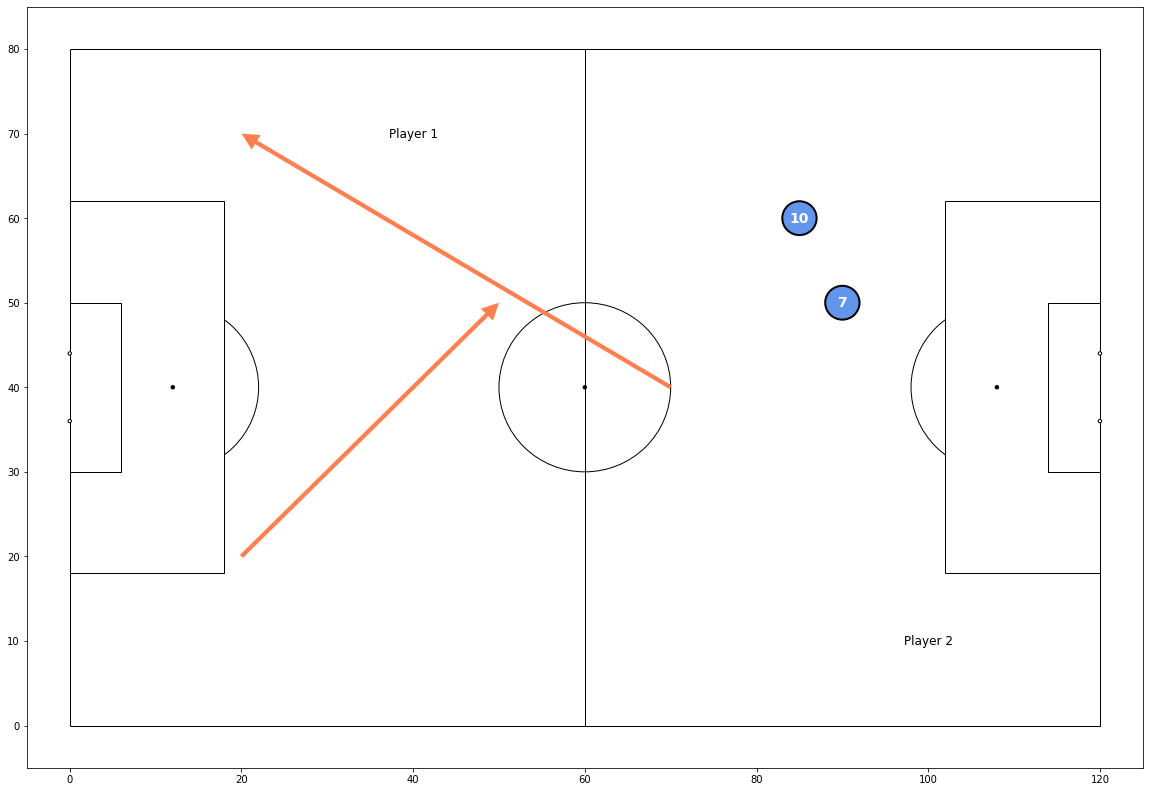

In [143]:
fig, ax = plt.subplots(figsize = (20, 14))
pitch = Pitch(xmax_data = 120, ymax_data = 80)
pitch.draw(ax)

lines = [(70, 40, 20, 70), (20, 20, 50, 50)]
pitch.draw_lines(ax, lines, graph_params = {"facecolor": "coral"})

points = [(90, 50), (85, 60)]
numbers = [7, 10]
pitch.draw_points(ax, points, numbers = numbers)

players = [(40, 70), (100, 10)]
names = ["Player 1", "Player 2"]

pitch.draw_players(ax, players, names, fontsize = 12)

plt.xlim(pitch.xlimit)
plt.ylim(pitch.ylimit)
plt.show()

In [ ]:





class Pitch(object):
    """
    This is a class for drawing a soccer pitch.
    Parameters
    ----------
    length : Length of field in yards. Default to 120.
    width : Width of field in yards. Default to 80.
    dimensions : Dimensions of interior lines in yards
            default = {'pen_length': 18, 'pen_width': 44,
                       'six_length': 6, 'six_width': 20,
                       'pk_length': 12, 'circle_rad': 10}
    vert : Plot field vertically. Default is False.
    scale : scaling factors for provider data.
            For StatsBomb (the default), use (120,80)
    padding : Padding for plot. Defaults to 5.
    Examples
    --------
    Basic Usage
    >>> from soccerutils.pitch import Pitch
    >>> import matplotlib.pyplot as plt
    >>> fig, ax = plt.subplots()
    >>> pitch = Pitch()
    >>> pitch.create_pitch(ax)
    >>> plt.ylim(pitch.ylim)
    >>> plt.xlim(pitch.xlim)
    >>> plt.show()
    """

    def __init__(self,
                 length=120,
                 width=80,
                 title=None,
                 dimensions=_default_dims,
                 vert=False,
                 scale=(120, 80),
                 padding=5):

        self.vert = vert
        self.length = length
        self.width = width
        self.x_scale = scale[0]
        self.y_scale = scale[1]
        self.title = title

        if self.vert:
            self.xlim = (-padding, self.width + padding)
            self.ylim = (-padding, self.length + padding)
        else:
            self.xlim = (-padding, self.length + padding)
            self.ylim = (-padding, self.width + padding)

        for k, v in dimensions.items():
            assert k in _default_dims.keys(), '{} not an attribute'.format(k)
            setattr(self, k, v)

    def __repr__(self):
        """
        Return string representation of Pitch object
        """
        return 'Pitch({}x{})'.format(self.length, self.width)

    def _pitch_components(self, cosmetics):

        rect, circ = patches.Rectangle, patches.Circle

        comps = {
            'border':
                (rect, {'xy': (0, 0),
                        'width': self.length,
                        'height': self.width}),

            'left_circle':
                (circ, {'xy': (self.pk_length, self.width/2),
                        'radius': self.circle_rad}),

            'right_circle':
                (circ, {'xy': (self.length-self.pk_length,
                               self.width/2),
                        'radius': self.circle_rad}),

            'left_penalty':
                (rect, {'xy': (0, (self.width/2)-(self.pen_width/2)),
                        'width': self.pen_length,
                        'height': self.pen_width}),

            'right_penalty':
                (rect, {'xy': (self.length,
                               (self.width/2)-(self.pen_width/2)),
                        'width': -self.pen_length,
                        'height': self.pen_width}),

            'left_pk_dot':
                (circ, {'xy': (self.pk_length, self.width/2),
                        'radius': 0.2,
                        'facecolor': cosmetics['edgecolor']}),

            'right_pk_dot':
                (circ, {'xy': (self.length-self.pk_length,
                               self.width/2),
                        'radius': 0.2,
                        'facecolor': cosmetics['edgecolor']}),

            'left_six':
                (rect, {'xy': (0, (self.width/2)-(self.six_width/2)),
                        'width': self.six_length,
                        'height': self.six_width}),

            'right_six':
                (rect, {'xy': (self.length,
                               (self.width/2)-(self.six_width/2)),
                        'width': -self.six_length,
                        'height': self.six_width}),

            'half_circle':
                (circ, {'xy': (self.length/2, self.width/2),
                        'radius': self.circle_rad}),

            'half_line':
                (rect, {'xy': (self.length/2, 0),
                        'width': 0,
                        'height': self.width}),

            'half_dot':
                (circ, {'xy': (self.length/2, self.width/2),
                        'radius': 0.2,
                        'facecolor': cosmetics['edgecolor']}),

            'post_left_top':
                (circ, {'xy': (0, self.width/2 + self.goal_size/2),
                        'radius': 0.2,
                        'facecolor': cosmetics['edgecolor']}),

            'post_left_bot':
                (circ, {'xy': (0, self.width/2 - self.goal_size/2),
                        'radius': 0.2,
                        'facecolor': cosmetics['edgecolor']}),

            'post_right_top':
                (circ, {'xy': (self.length, self.width/2 + self.goal_size/2),
                        'radius': 0.2,
                        'facecolor': cosmetics['edgecolor']}),

            'post_right_bot':
                (circ, {'xy': (self.length, self.width/2 - self.goal_size/2),
                        'radius': 0.2,
                        'facecolor': cosmetics['edgecolor']}),
        }

        if self.vert:
            for k, (shape, attrs) in comps.items():
                attrs['xy'] = (attrs['xy'][1], attrs['xy'][0])
                if shape == rect:
                    new_width = attrs['height']
                    attrs['height'] = attrs['width']
                    attrs['width'] = new_width

        all_patches = []
        for k, (s, p_attrs) in comps.items():
            attrs = {k: v for k, v in cosmetics.items()}
            for at, v in p_attrs.items():
                attrs[at] = v
            all_patches.append(s(**attrs))

        return all_patches

    def x_adj(self, x):
        """
        X Coordinate Adjuster for Spatial Data
        Parameters
        ----------
        x: spatial x coordinate from data provider
        Returns
        -------
        Float
            An adjusted x coordinate for field scale
        Examples
        --------
        >>> from soccerutils.pitch import Pitch
        >>> pitch = Pitch(length=120, width=80)
        >>> sb_x, sb_y = 60, 40
        >>> pitch.x_adj(sb_x)
        60
        """
        return x * (self.length / self.x_scale)

    def y_adj(self, y):
        """
        Y Coordinate Adjuster for Spatial Data
        Parameters
        ----------
        y: spatial y coordinate from data provider
        Returns
        -------
        Float
            An adjusted y coordinate for field scale
        Examples
        --------
        >>> from soccerutils.pitch import Pitch
        >>> pitch = Pitch(length=120, width=80)
        >>> sb_x, sb_y = 60, 40
        >>> pitch.x_adj(sb_x)
        40
        """
        return y * (self.width / self.y_scale)

    def draw_lines(self, ax, lines, cosmetics=_pass_cosmetics):
        """
        Add Lines to Particular Axes (passes, etc.)
        Parameters
        ---------
        ax: matplotlib Axes object
        lines: list of line coordinates
            eg. - >>> [(x, y, end_x, end_y)]
        cosmetics: dict of keyword arguments for patches.FancyArrow()
            default = {'length_includes_head': True,
                       'head_width': 2,
                       'head_length': 2,
                       'width': 0.5,
                       'facecolor': (0, 0, 1, 0.6),
                       'edgecolor': (0, 0, 0, 0)}
        Examples
        -------
        >>> from soccerutils.pitch import Pitch
        >>> import matplotlib.pyplot as plt
        >>> fig, ax = plt.subplots()
        >>> pitch = Pitch()
        >>> pitch.create_pitch(ax)
        >>> lines = [(60, 60, 25, 25), (20, 20, 50, 50)]
        >>> pitch.draw_lines(ax, lines)
        >>> plt.ylim(pitch.ylim)
        >>> plt.xlim(pitch.xlim)
        >>> plt.show()
        """

        # TODO Accept Different Pass Vector Formats
        for x, y, end_x, end_y in lines:

            y = (self.y_scale-y) if self.vert else y
            end_y = (self.y_scale-end_y) if self.vert else end_y

            dx = end_x - x
            dy = end_y - y

            attributes = {
                'x': self.y_adj(y) if self.vert else self.x_adj(x),
                'y': self.x_adj(x) if self.vert else self.y_adj(y),
                'dx': self.y_adj(dy) if self.vert else self.x_adj(dx),
                'dy': self.x_adj(dx) if self.vert else self.y_adj(dy)
            }

            ax.add_patch(patches.FancyArrow(**attributes, **cosmetics))

    def draw_players(self, ax, points, labels):
        for i, label in enumerate(labels):
            x, y = points[i]
            ax.text(self.x_adj(x), self.y_adj(y), label,
                    fontsize=7, ha='center', va='center')

    def draw_points(self, ax, shots, cosmetics=_point_cosmetics):
        """
        Add Points to Particular Axes
        Parameters
        ---------
        ax: matplotlib Axes object
        points: list of point coordinates
            eg. - >>> [(x, y)]
        cosmetics: dict of keyword arguments for patches.Circle()
            default = {'linewidth': 1,
                       'facecolor': (0, 0, 1, 0.6),
                       'edgecolor': (0, 0, 0, 0),
                       'radius': 1}
        Examples
        -------
        >>> from soccerutils.pitch import Pitch
        >>> import matplotlib.pyplot as plt
        >>> fig, ax = plt.subplots()
        >>> pitch = Pitch()
        >>> pitch.create_pitch(ax)
        >>> shots = [(90, 50), (85, 60)]
        >>> pitch.draw_points(ax, shots)
        >>> plt.ylim(pitch.ylim)
        >>> plt.xlim(pitch.xlim)
        >>> plt.show()
        """
        for x, y in shots:

            y = (self.y_scale-y) if self.vert else y

            attributes = {
                'xy': (self.y_adj(y) if self.vert else self.x_adj(x),
                       self.x_adj(x) if self.vert else self.y_adj(y))
            }

            ax.add_patch(patches.Circle(**attributes, **cosmetics))

    def create_pitch(self, ax, cosmetics=_pitch_cosmetics):
        """
        Draw Pitch on Axes
        Parameters
        ---------
        ax: matplotlib Axes object
        cosmetics: dict of keyword arguments for pitch component patches.
            default = {'linewidth': 1,
                       'facecolor': (1, 1, 1, 1),
            'edgecolor': (0, 0, 0, 1)}
        Examples
        -------
        >>> from soccerutils.pitch import Pitch
        >>> import matplotlib.pyplot as plt
        >>> fig, ax = plt.subplots()
        >>> pitch = Pitch()
        >>> pitch.create_pitch(ax)
        >>> plt.ylim(pitch.ylim)
        >>> plt.xlim(pitch.xlim)
        >>> plt.show()
        """
        if self.title is not None:
            ax.text(0, self.width+1, self.title, fontsize=12)

        for patch in self._pitch_components(cosmetics):
            ax.add_patch(patch)